This file is to examine algoritmic fairness based on DAF methods, i.e., the MH and the LR method method.  
Please change the path to your local path.  
You can play on this python file by changing the values of `fair_var` and `group_12` to investigate the fairness on different groups.  
Please see the `functions.py` file to have clearer understanding of DAF functions.  
This file is based on `48_DAF_only.ipynb` in my original workflow.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,roc_auc_score,classification_report,\
    confusion_matrix,roc_curve,precision_score,recall_score, matthews_corrcoef
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency, chi2, pointbiserialr
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# import the user-defined functions
from functions import *

In [3]:
# load the data from NN model
data = pd.read_csv('../03_outputs/02_tables/11_NN_outcome_wo_procted_1111_aware.csv')
# load the data from logistic regression model
# data = pd.read_csv('../03_outputs/02_tables/10_logreg_outcome_w_procted_1111.csv')

In [4]:
# change the race vairable's level names
# I merged the pacific islander to native
data.loc[data["X1RACE"] == "White, non-Hispanic","X1RACE"] = "white"
data.loc[data["X1RACE"] == "Black/African-American, non-Hispanic","X1RACE"] = "black"
data.loc[data["X1RACE"] == "Hispanic, race specified","X1RACE"] = "hispanic"
data.loc[data["X1RACE"] == "Hispanic, no race specified","X1RACE"] = "hispanic"
data.loc[data["X1RACE"] == "Asian, non-Hispanic","X1RACE"] = "asian"
data.loc[data["X1RACE"] == "Amer. Indian/Alaska Native, non-Hispanic","X1RACE"] = "native"
data.loc[data["X1RACE"] == "Native Hawaiian/Pacific Islander, non-Hispanic","X1RACE"] = "native"
data.loc[data["X1RACE"] == "More than one race, non-Hispanic","X1RACE"] = "other"

# change the name of column "y_pred_prob" and "X4EVERDROP"
data.rename(columns={'y_pred_prob':'prob','X4EVERDROP':'true'}, inplace=True)

In [5]:
# get the descriptive statistics of SES
data['X1SES_U'].describe()
# create a new column to indicate whether the SES level based on quantiles
data['SES_level'] = pd.qcut(data['X1SES_U'], 4, labels=False)
# change the name of the SES level
data.loc[data["SES_level"] == 0,"SES_level"] = "low"
data.loc[data["SES_level"] == 1,"SES_level"] = "low-mid"
data.loc[data["SES_level"] == 2,"SES_level"] = "mid-high"
data.loc[data["SES_level"] == 3,"SES_level"] = "high"

In [6]:
# convert the X1SEX, X1RACE into categorical variables
data['X1SEX'] = data['X1SEX'].astype('category')
data['X1RACE'] = data['X1RACE'].astype('category')
data['X1SEX'] = data['X1SEX'].replace({1: 'male', 0: 'female'})

In [7]:
data_subgroup = data.loc[(data['X1RACE'].isin(["white","black"])), :]

In [8]:
data_subgroup["X1RACE"].value_counts()  

white       1850
black        387
asian          0
hispanic       0
native         0
other          0
Name: X1RACE, dtype: int64

In [9]:
data['X1RACE'].value_counts()

white       1850
hispanic     590
black        387
asian        310
other        295
native        35
Name: X1RACE, dtype: int64

- Academic performance: `S1MSCORE`, `X1TXMTSCOR`  
- Expectation: `X1PAREDEXPCT`, `X1STUEDEXPCT`
- School belonging: `X1SCHOOLENG`,`X1SCHOOLBEL`  
- SES: `X1SES_U`

In [28]:
# fair_var = ["X1SES_U", "X1SCHOOLBEL", "S1MSCORE"]
fair_var = ["X1SES_U", "X1SCHOOLENG", "S1MSCORE"]
group_12 = ["female", "male"]

In [29]:
# test this function
threshold = np.arange(0.15,0.9,0.05)
p_values = DAF_MH_MultiFV(threshold=threshold, fair=fair_var, group1=group_12[0], group2=group_12[1], data=data, K=3)

(258, 29)
(141, 29)
(54, 29)
(214, 29)
(135, 29)
(72, 29)
(99, 29)
(111, 29)
(74, 29)
(205, 29)
(136, 29)
(97, 29)
(153, 29)
(152, 29)
(127, 29)
(61, 29)
(108, 29)
(114, 29)
(100, 29)
(151, 29)
(131, 29)
(80, 29)
(157, 29)
(199, 29)
(34, 29)
(97, 29)
(207, 29)
(258, 29)
(141, 29)
(54, 29)
(214, 29)
(135, 29)
(72, 29)
(99, 29)
(111, 29)
(74, 29)
(205, 29)
(136, 29)
(97, 29)
(153, 29)
(152, 29)
(127, 29)
(61, 29)
(108, 29)
(114, 29)
(100, 29)
(151, 29)
(131, 29)
(80, 29)
(157, 29)
(199, 29)
(34, 29)
(97, 29)
(207, 29)
(258, 29)
(141, 29)
(54, 29)
(214, 29)
(135, 29)
(72, 29)
(99, 29)
(111, 29)
(74, 29)
(205, 29)
(136, 29)
(97, 29)
(153, 29)
(152, 29)
(127, 29)
(61, 29)
(108, 29)
(114, 29)
(100, 29)
(151, 29)
(131, 29)
(80, 29)
(157, 29)
(199, 29)
(34, 29)
(97, 29)
(207, 29)
(258, 29)
(141, 29)
(54, 29)
(214, 29)
(135, 29)
(72, 29)
(99, 29)
(111, 29)
(74, 29)
(205, 29)
(136, 29)
(97, 29)
(153, 29)
(152, 29)
(127, 29)
(61, 29)
(108, 29)
(114, 29)
(100, 29)
(151, 29)
(131, 29)
(80, 29)
(157

In [30]:
max_p = max(p_values)
print(max_p)

0.9956719871543307


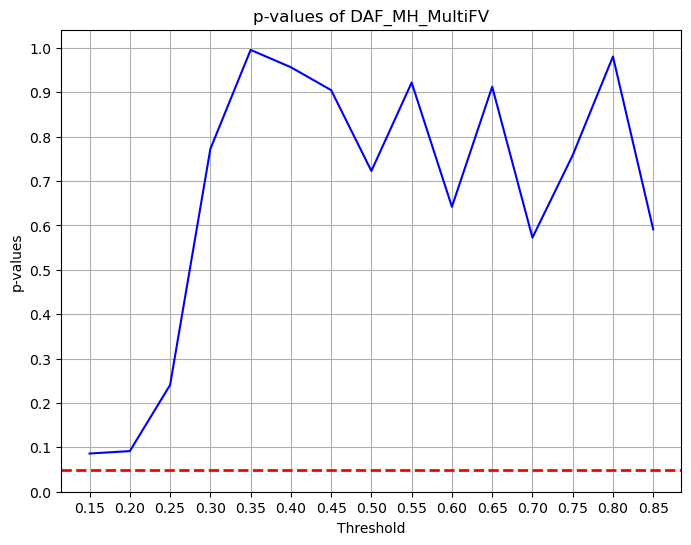

In [32]:
# plot the p-values
plt.figure(figsize=(8,6))
plt.plot(threshold, p_values, color="blue")
# set the range of y-axis to be 0 to 1 with the interval of 0.1
plt.yticks(np.arange(0,1.1,0.1))
# set the range of x-axis to be 0.15 to 0.9 with the interval of 0.05
plt.xticks(np.arange(0.15,0.9,0.05))
# add a horizontal line at y=0.05
plt.axhline(0.05, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("p-values")
plt.title("p-values of DAF_MH_MultiFV")
plt.grid()
plt.show()

In [34]:
# test this function
threshold = np.arange(0.25,0.9,0.05)
non_daf, uni_daf, non_uni_daf= DAF_LR_MultiFV(threshold=threshold,fair=fair_var,  group1=group_12[0], 
                          group2=group_12[1],data=data)

------------------ Threshold:  0.25  ------------------
1    3046
0     421
Name: pred, dtype: int64
------------------ check point 2 ------------------
Optimization terminated successfully.
         Current function value: 0.182533
         Iterations 9
------------------ check point 3 ------------------
Optimization terminated successfully.
         Current function value: 0.182931
         Iterations 9
------------------ check point 4 ------------------
Optimization terminated successfully.
         Current function value: 0.182925
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.182931
         Iterations 9
------------------ check point 5 ------------------
Optimization terminated successfully.
         Current function value: 0.182533
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.182925
         Iterations 9
------------------ Threshold:  0.3  ------------------
1    2606
0     861
Name

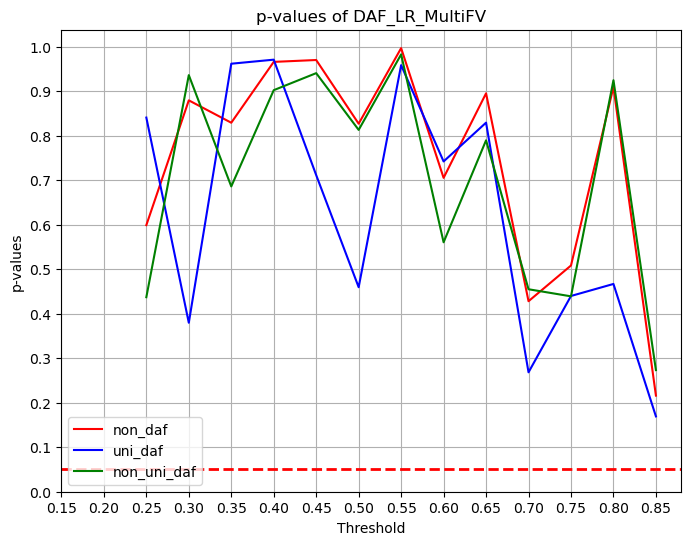

In [35]:
# plot these p-values on same plot
plt.figure(figsize=(8,6))
plt.plot(threshold, non_daf, label="non_daf", color="red")
plt.plot(threshold, uni_daf, label="uni_daf", color="blue")
plt.plot(threshold, non_uni_daf, label="non_uni_daf", color="green")
# set the range of y-axis to be 0 to 1 with the interval of 0.1
plt.yticks(np.arange(0,1.1,0.1))
# set the range of x-axis to be 0.15 to 0.9 with the interval of 0.05
plt.xticks(np.arange(0.15,0.9,0.05))
# add a horizontal line at y=0.05
plt.axhline(0.05, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("p-values")
plt.title("p-values of DAF_LR_MultiFV")
plt.legend()
plt.grid()
plt.show()